In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import random

In [16]:
import os 

masks_dir = "/Users/amalahmadinurov/Desktop/BP/uniocorn-task-9/masks/"
images_dir = "/Users/amalahmadinurov/Desktop/BP/uniocorn-task-9/images/"

unique_lbls = [0,1,2]
classes_names = ["tumor", "stroma", "rest"]
unique_lbls_counts = []
classes_counts = {}
masks_paths = []
images_paths = []

for class_lbl in unique_lbls:
    classes_counts[class_lbl] = 0

label_pixel_count = 0
for filename in os.listdir(masks_dir):
    if filename.startswith("."):
        continue
    masks_paths.append(os.path.join(masks_dir, filename))
    images_paths.append(os.path.join(images_dir, filename))
    img = cv2.imread(os.path.join(masks_dir, filename))
    unique_lbls_counts.append(len(list(np.unique(img))))

    unique, counts = np.unique(img, return_counts=True)
    for idx, count in enumerate(counts):
        classes_counts[int(unique[idx])] += int(count)
classes_counts

{0: 239610900, 1: 221958111, 2: 211134210}

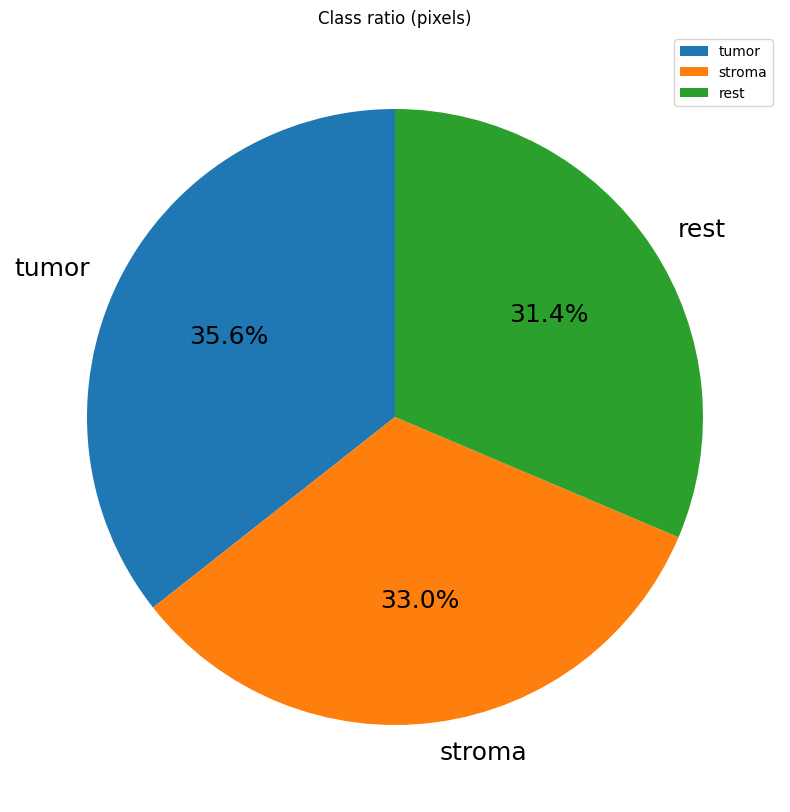

In [17]:
# Example data
counts = classes_counts.values()

def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{pct:.1f}% ({count})"
    return inner_autopct
plt.figure(figsize=(10, 10), dpi=100)
plt.pie(counts, labels=classes_names,autopct='%1.1f%%',  # shows percentage and the raw number
    startangle=90, textprops={'fontsize': 18}   )
plt.legend(loc="best")



# Add labels and title

plt.title("Class ratio (pixels)")

# Show the plot
plt.show()

/Users/amalahmadinurov/Desktop/BP/binary/images/TCGA-E2-A1L7-01Z-00-DX1.BE796CD2-2E81-44E8-8CA2-85B4D2A31B64_[26144, 9497, 26311, 9642].png


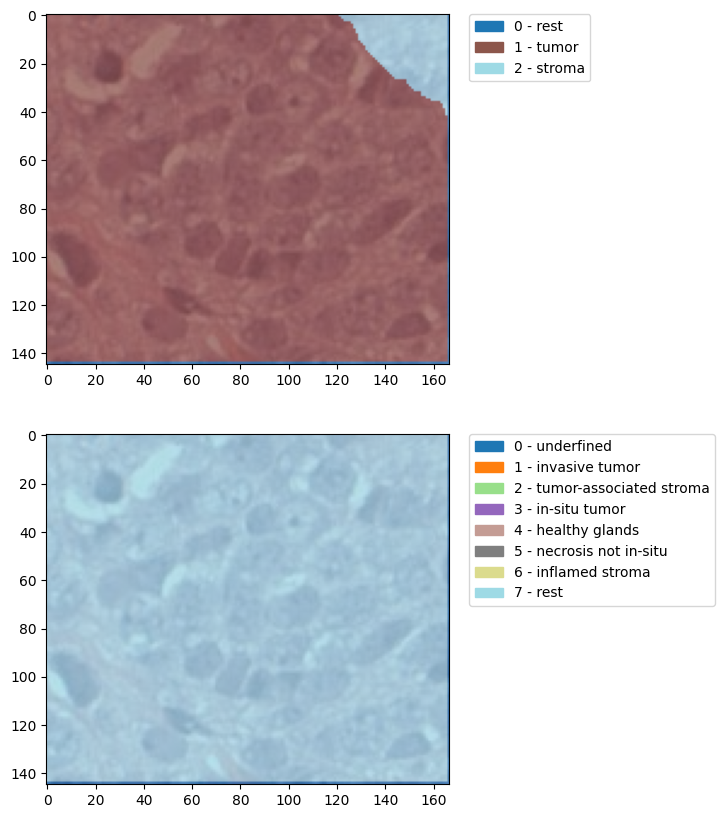

In [70]:
import torch
from torchvision.io import decode_image, ImageReadMode
from torchvision.transforms import InterpolationMode, Resize, ColorJitter, Normalize, GaussianBlur
import torchvision.transforms.v2.functional as F
import os
import random
import matplotlib.patches as mpatches
idx = random.randint(0,1000)

original_images_path = "/Users/amalahmadinurov/Desktop/BP/binary/images/"
original_masks_path = "/Users/amalahmadinurov/Desktop/BP/binary/masks/"



image_path, mask_path = images_paths[idx], masks_paths[idx]
origin_image_path, origin_mask_path =  image_path.replace(images_dir, original_images_path), mask_path.replace(masks_dir, original_masks_path)

image = (decode_image(image_path, mode=ImageReadMode.RGB).float() / 255.0).numpy().transpose(1,2,0)
mask  = (decode_image(mask_path, mode=ImageReadMode.GRAY).float()).numpy().transpose(1,2,0)
print(origin_image_path)
image2 = (decode_image(origin_image_path, mode=ImageReadMode.RGB).float() / 255.0).numpy().transpose(1,2,0)
mask2  = (decode_image(origin_mask_path, mode=ImageReadMode.GRAY).float()).numpy().transpose(1,2,0)



classes_names = {0:"underfined", 1:"invasive tumor", 2:"tumor-associated stroma", 3:"in-situ tumor", 4:"healthy glands", 5:"necrosis not in-situ", 6:"inflamed stroma", 7:"rest"}
classes_names_task_9 = {0:"rest", 1:"tumor", 2:"stroma"}

fig,axes = plt.subplots(2, 1, figsize=(20, 10)) 

cmap = plt.get_cmap("tab20", len(classes_names_task_9))

axes[0].imshow(image)
axes[0].imshow(mask, cmap="tab20", alpha=0.75)
patches = [mpatches.Patch(color=cmap(i), label=f"{i} - {name}")
           for i, name in classes_names_task_9.items()]
axes[0].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)




cmap2 = plt.get_cmap("tab20", len(classes_names))

axes[1].imshow(image2)
axes[1].imshow(mask2, cmap=cmap2, alpha=0.75)
patches2 = [mpatches.Patch(color=cmap2(i), label=f"{i} - {name}")
           for i, name in classes_names.items()]
axes[1].legend(handles=patches2, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)